In [2]:
import re
import json
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ollama

import sys
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv('../.env')
OPENAI_KEY = os.getenv('OPENAI_KEY')
client = OpenAI(api_key=OPENAI_KEY)

MODEL = 'snowflake-arctic-embed:latest'

fox = 'The quick brown fox jumps over the lazy dog'
#fox_embedding = ollama.embeddings(model=MODEL, prompt=fox)

def generate_embedding(text):
    response = client.embeddings.create(input=text, model="text-embedding-3-large")
    res = response.data[0].embedding
    return res

fox_embedding = generate_embedding(fox)

In [7]:
# variations = ['The swift brown fox jumps over the lazy dog',
# 'The quick red fox jumps over the lazy dog',
# 'The quick brown fox leaps over the lazy dog',
# 'The quick brown fox jumps over the sleepy dog',
# 'The quick brown fox jumps over the lazy cat',
# 'The slow brown fox jumps over the lazy dog',
# 'The quick brown fox crawls over the lazy dog',
# 'The quick brown fox jumps under the lazy dog',
# 'The quick brown fox jumps over the energetic dog',
# 'The quick brown fox avoids the lazy dog',
# 'The quick brown fox befriends the lazy dog',
# 'The robotic brown fox jumps over the lazy dog',
# 'The quick brown fox jumps over the extinct dog',
# 'The quick brown penguin jumps over the lazy dog',
# 'The quick brown fox teleports over the lazy dog',
# 'The quick brown fox jumps over the holographic dog',
# 'The quick brown fox jumps over the lazy elephant',
# 'The invisible brown fox jumps over the lazy dog',
# 'The quick brown fox jumps over the microscopic dog',
# 'The quick brown fox contemplates the lazy dog']


variations = ['The swift brown fox jumps over the lazy dog',
'The quick red fox jumps over the lazy dog',
'The quick brown fox leaps over the lazy dog',
'The quick brown fox jumps over the sleepy dog',
'The quick brown fox jumps over the lazy cat',
'The slow brown fox jumps over the lazy dog',
'The quick brown fox crawls over the lazy dog',
'The quick brown fox jumps under the lazy dog',
'The quick brown fox jumps over the energetic dog',
'The quick brown fox avoids the lazy dog',
'The quick brown fox befriends the lazy dog',
'The robotic brown fox jumps over the lazy dog',
'The quick brown fox jumps over the extinct dog',
'The quick brown penguin jumps over the lazy dog',
'The quick brown fox teleports over the lazy dog',
'The quick brown fox jumps over the holographic dog',
'The quick brown fox jumps over the lazy elephant',
'The invisible brown fox jumps over the lazy dog',
'The quick brown fox jumps over the microscopic dog',
'The quick brown fox contemplates the lazy dog']

print(len(variations))

6


In [9]:

variations_dict = {}

for i in range(len(variations)):
    print(variations[i])
    embedding = generate_embedding(variations[i])
    variations_dict[variations[i]] = embedding

#print(variations_dict['The quick brown fox contemplates the lazy dog'])

I love you.
I love you...not!
I love you...not! Kidding!
I love you...not! Kidding! I do love you.
I love you...not! Kidding! I do love you. I do ... not!
I love you...not! Kidding! I do love you. I do ... not, not love you.


(7, 3072)


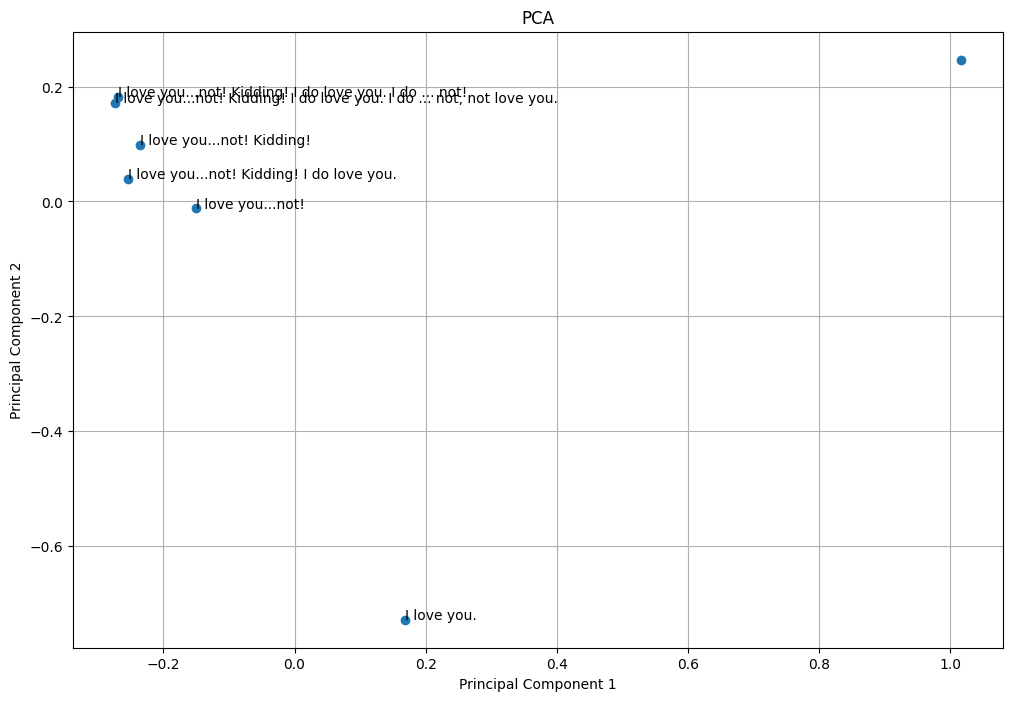

In [10]:
import numpy as np

# Extract embeddings and names
names = list(variations_dict.keys())
#names = names + ['The quick brown fox jumps over the the lazy dog']
embeddings = np.array(list(variations_dict.values()))
embeddings = np.vstack((embeddings, fox_embedding))

print(embeddings.shape)
#embeddings[0]

# Perform PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o')

# Annotate each point with the character name
for i, name in enumerate(names):
    plt.annotate(name, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [20]:
import chromadb
from chromadb.utils import embedding_functions

# Assume you have these:
single_embedding = fox_embedding # Your single embedding
list_of_20_embeddings = variations_dict.values()  # Your list of 20 embeddings

# Create a temporary collection for the 20 embeddings
client = chromadb.Client()
collection = client.create_collection(name="docs")

# Add the 20 embeddings to the temporary collection
for i, d in enumerate(variations):
  response = ollama.embeddings(model="snowflake-arctic-embed:latest", prompt=d)
  embedding = response["embedding"]
  collection.add(
    ids=[str(i)],
    embeddings=[embedding],
    documents=[d]
  )

original = 'The quick brown fox jumps over the the lazy dog'



ValueError: Expected collection name that (1) contains 3-63 characters, (2) starts and ends with an alphanumeric character, (3) otherwise contains only alphanumeric characters, underscores or hyphens (-), (4) contains no two consecutive periods (..) and (5) is not a valid IPv4 address, got temp_collection__